**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [3]:
%load_ext autoreload
%autoreload 2 
from Problem_1 import CO2Model

In [4]:
CO2 = CO2Model(par)
CO2.solve_grid()

p1_ast = 0.94, p2_ast = 1.58


**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.

In [5]:
CO2.solve(do_print=True)

sol.p1 = 0.98, sol.p2 = 1.49
errors = (4.278454812656207e-10, 6.628760873539363e-10, 9.765484430701576e-05)


In [6]:
CO2.solve(do_print=True,method='excess_step')

  0: p1 = 0.94444444, p2 = 1.57777778 -> excess goods demand ->     0.06623647     0.06623647
  1: p1 = 0.98961706, p2 = 1.51154130 -> excess goods demand ->     0.01231352     0.01231352
  2: p1 = 0.98147563, p2 = 1.49922778 -> excess goods demand ->     0.00506567     0.00506567
  3: p1 = 0.97815872, p2 = 1.49416212 -> excess goods demand ->     0.00199685     0.00199685
  4: p1 = 0.97685147, p2 = 1.49216526 -> excess goods demand ->     0.00081718     0.00081718
   ...
 20: p1 = 0.97590104, p2 = 1.49071346 -> excess goods demand ->     0.00000001     0.00000001
sol.p1 = 0.98, sol.p2 = 1.49
errors = (6.3422591622952496e-09, 9.687960988991051e-09, 9.763561860876013e-05)


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

Grid search:
tau = 0.000, sol.U = -0.5876, sol.y2 = 0.7454, SWF = -0.66216
tau = 0.016, sol.U = -0.5876, sol.y2 = 0.7433, SWF = -0.66196
tau = 0.032, sol.U = -0.5877, sol.y2 = 0.7412, SWF = -0.66178
tau = 0.047, sol.U = -0.5877, sol.y2 = 0.7391, SWF = -0.66163
tau = 0.063, sol.U = -0.5878, sol.y2 = 0.7370, SWF = -0.66149
tau = 0.079, sol.U = -0.5879, sol.y2 = 0.7350, SWF = -0.66137
tau = 0.095, sol.U = -0.5880, sol.y2 = 0.7329, SWF = -0.66128
tau = 0.111, sol.U = -0.5881, sol.y2 = 0.7309, SWF = -0.66120
tau = 0.126, sol.U = -0.5883, sol.y2 = 0.7288, SWF = -0.66115
tau = 0.142, sol.U = -0.5884, sol.y2 = 0.7268, SWF = -0.66111
tau = 0.158, sol.U = -0.5886, sol.y2 = 0.7248, SWF = -0.66109
tau = 0.174, sol.U = -0.5888, sol.y2 = 0.7228, SWF = -0.66109
tau = 0.189, sol.U = -0.5890, sol.y2 = 0.7208, SWF = -0.66110
tau = 0.205, sol.U = -0.5893, sol.y2 = 0.7188, SWF = -0.66114
tau = 0.221, sol.U = -0.5895, sol.y2 = 0.7169, SWF = -0.66119
tau = 0.237, sol.U = -0.5898, sol.y2 = 0.7149, SWF = -0.6

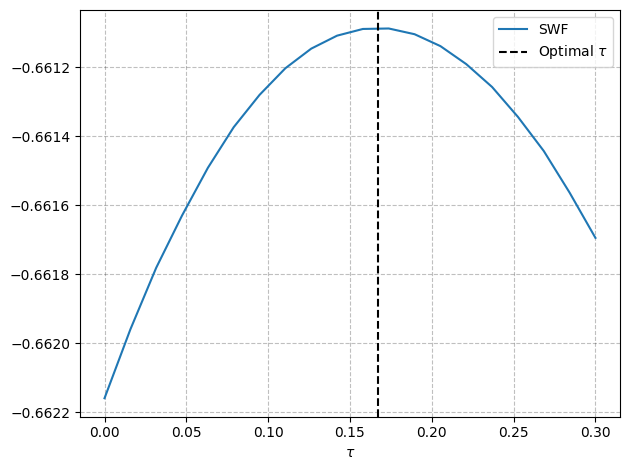

In [7]:
CO2.optimal_gov()

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [8]:

par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


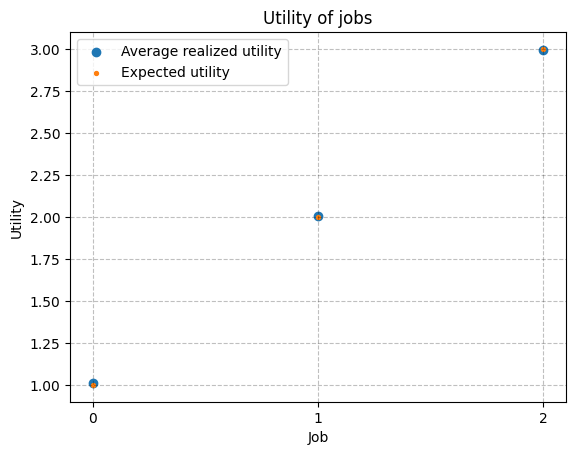

In [9]:
from Problem_2 import CareerChoiceModel
morty = CareerChoiceModel(**par.__dict__)
sim = morty.sim 
par = morty.par

np.random.seed(123)
morty.simulate()

morty.plot_post_utility()

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their career choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

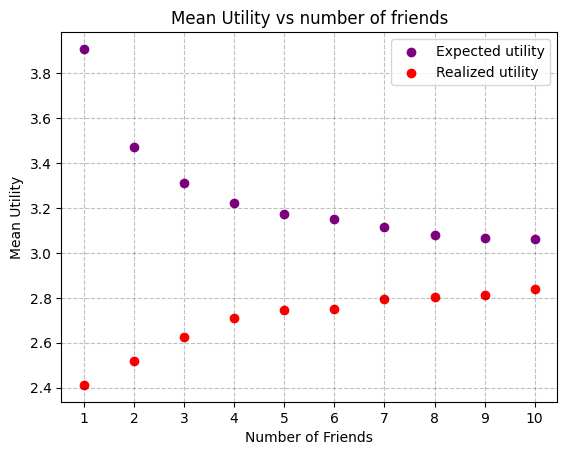

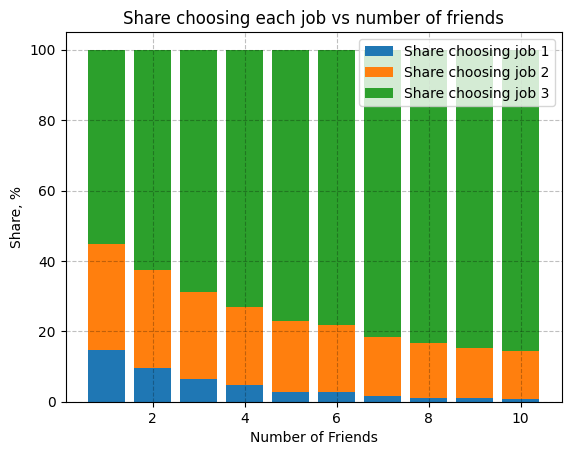

In [10]:
morty.utility()
morty.plot_utility()

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

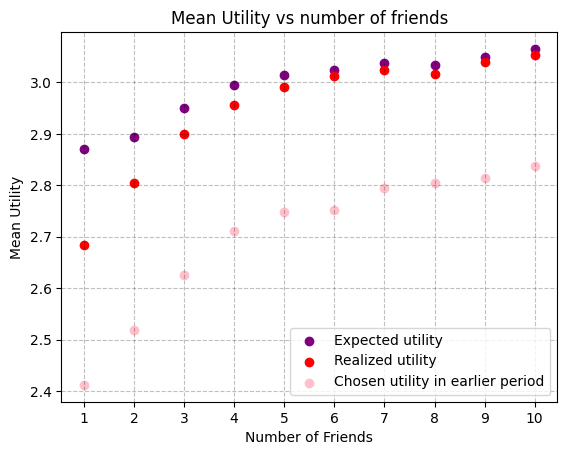

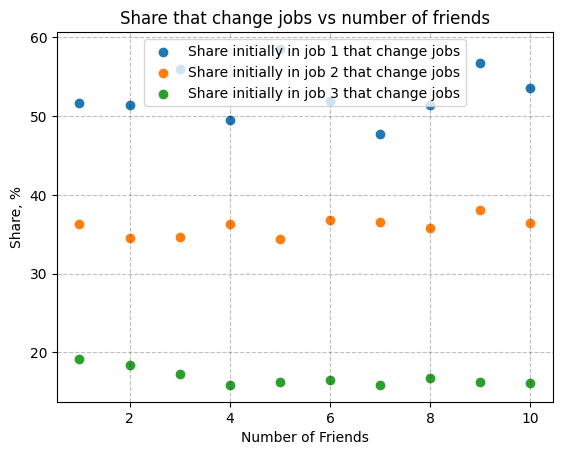

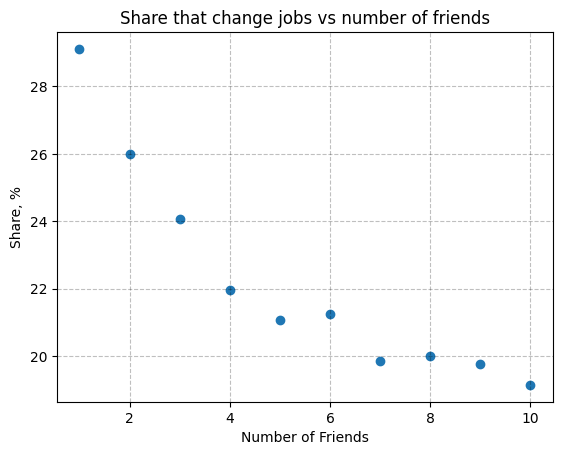

In [11]:
morty.career_change()
morty.plot_utility_change()

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [12]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


In [13]:
y

array([0.20901926, 0.37774759])

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})

In [15]:
def find_ABCD(X,y):

    # upper right
    I = (X[:,0] > y[0]) & (X[:,1] > y[1])
    i = np.argmin(np.sqrt((X[I,0]-y[0])**2+(X[I,1]-y[1])**2))
    A = np.array([X[I,0][i],X[I,1][i]])

    # lower right
    I = (X[:,0] > y[0]) & (X[:,1] < y[1])
    i = np.argmin(np.sqrt((X[I,0]-y[0])**2+(X[I,1]-y[1])**2))
    B = np.array([X[I,0][i],X[I,1][i]])

    # lower left
    I = (X[:,0] < y[0]) & (X[:,1] < y[1])
    i = np.argmin(np.sqrt((X[I,0]-y[0])**2+(X[I,1]-y[1])**2))
    C = np.array([X[I,0][i],X[I,1][i]])

    # upper left
    I = (X[:,0] < y[0]) & (X[:,1] > y[1])
    i = np.argmin(np.sqrt((X[I,0]-y[0])**2+(X[I,1]-y[1])**2))
    D = np.array([X[I,0][i],X[I,1][i]])

    return A,B,C,D

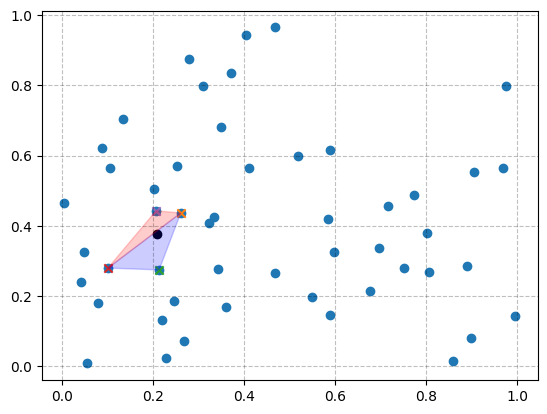

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(X[:,0],X[:,1])
ax.scatter(y[0],y[1],color='black')

A,B,C,D = find_ABCD(X,y)

ax.scatter(A[0],A[1],marker='x')
ax.scatter(B[0],B[1],marker='x')
ax.scatter(C[0],C[1],marker='x')
ax.scatter(D[0],D[1],marker='x')

ax.add_patch(Polygon([A,B,C],closed=True,color='blue',alpha=0.2))
ax.add_patch(Polygon([C,D,A],closed=True,color='red',alpha=0.2));

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [17]:
def find_barycentric_coordinates(x,A,B,C):

    denom = (B[1]-C[1])*(A[0]-C[0]) + (C[0]-B[0])*(A[1]-C[1])
    r1 = ((B[1]-C[1])*(x[0]-C[0]) + (C[0]-B[0])*(x[1]-C[1]))/denom
    r2 = ((C[1]-A[1])*(x[0]-C[0]) + (A[0]-C[0])*(x[1]-C[1]))/denom
    r3 = 1 - r1 - r2

    inside = (r1 >= 0) & (r2 >= 0) & (r3 >= 0) & (r1 <= 1) & (r2 <= 1) & (r3 <= 1)

    return np.array([r1,r2,r3]),inside

In [18]:
r_ABC,inside_ABC = find_barycentric_coordinates(y,A,B,C)
r_CDA,inside_CDA = find_barycentric_coordinates(y,C,D,A)

assert np.allclose(y,r_ABC[0]*A + r_ABC[1]*B + r_ABC[2]*C)
assert np.allclose(y,r_CDA[0]*C + r_CDA[1]*D + r_CDA[2]*A)

print('ABC',r_ABC,inside_ABC)
print('CDA',r_CDA,inside_CDA)

ABC [0.62862632 0.06910145 0.30227223] True
CDA [ 0.36825988 -0.13392662  0.76566674] False


In [19]:
find_barycentric_coordinates([0.1,0.1],A,B,C)

(array([-1.09251191,  1.54898709,  0.54352482]), False)

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [20]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [21]:
fy_approx = r_ABC[0]*f(A) + r_ABC[1]*f(B) + r_ABC[2]*f(C)
print(f'{f(y) = : .4f}, {fy_approx = : .4f}')

f(y) =  0.0790, fy_approx =  0.0841


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [22]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [23]:

fY_true = np.array([f(y_) for y_ in Y])
fY_approx = np.zeros(fY_true.shape)

for i,y_ in enumerate(Y):

    try:
    
        A,B,C,D = find_ABCD(X,y_)
    
    except:

        fY_approx[i] = np.nan
        continue

    r_ABC,inside_ABC = find_barycentric_coordinates(y_,A,B,C)

    if inside_ABC:

        fY_approx[i] = r_ABC[0]*f(A) + r_ABC[1]*f(B) + r_ABC[2]*f(C)
        continue

    r_CDA,inside_CDA = find_barycentric_coordinates(y_,C,D,A)
    if inside_CDA:

        fY_approx[i] = r_CDA[0]*f(C) + r_CDA[1]*f(D) + r_CDA[2]*f(A)
        continue

    fY_approx[i] = np.nan

for i,y_ in enumerate(Y):
    print(f'{y_[0] = : .4f}, {y_[1] = : .4f}: {fY_true[i] = : .4f}, {fY_approx[i] = : .4f}')

y_[0] =  0.2000, y_[1] =  0.2000: fY_true[i] =  0.0400, fY_approx[i] =  0.0403
y_[0] =  0.8000, y_[1] =  0.2000: fY_true[i] =  0.1600, fY_approx[i] =  0.1587
y_[0] =  0.8000, y_[1] =  0.8000: fY_true[i] =  0.6400, fY_approx[i] =  nan
y_[0] =  0.8000, y_[1] =  0.2000: fY_true[i] =  0.1600, fY_approx[i] =  0.1587
y_[0] =  0.5000, y_[1] =  0.5000: fY_true[i] =  0.2500, fY_approx[i] =  0.2513
